# 중심차분

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def numerical_diff(f,x):

    h = 1e-4 #0.0001

    return (f(x+h)-f(x-h))/2*h

In [40]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [41]:
x = np.arange(0.0, 20.0, 0.1)

In [42]:
y = function_1(x)

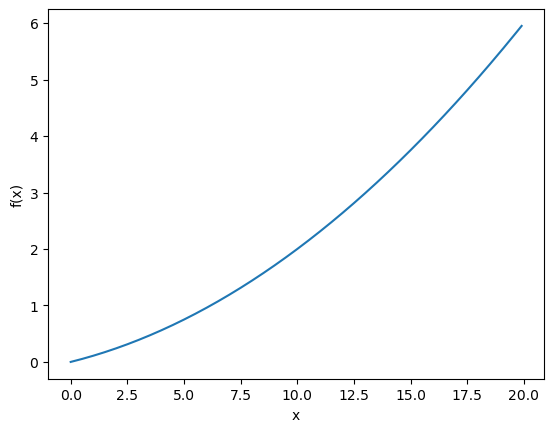

In [43]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y);

In [44]:
numerical_diff(function_1, 5)

1.9999999999908982e-09

In [45]:
numerical_diff(function_1, 10)

2.999999999986347e-09

# 편미분

In [46]:
def function_2(x):
    return x[0] ** 2 + x[1] **2

In [47]:
def function_tmp1(x0):
    return x0**2+4**2

In [48]:
numerical_diff(function_tmp1,3)

6.000000000003781e-08

In [49]:
def function_tmp2(x1):
    return 3**2 + x1**2

In [50]:
numerical_diff(function_tmp2,3)

6.000000000003781e-08

# 기울기 

In [60]:
def numerical_gradient(f,x) :
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size) :
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fhx1 = f(x)
        
        x[idx] = tmp_val -h
        fhx2 = f(x) 
        
        grad[idx] = (fhx1 - fhx2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [61]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([6., 8.])

In [62]:
np.zeros_like(np.array([3.0,4.0,5.0]))

array([0., 0., 0.])

In [63]:
numerical_gradient(function_2, np.array([0.0,0.0]))

array([0., 0.])

In [69]:
def gradient_descent(f, init_x, lr, step_num) :
    x = init_x.copy()
    
    for i in range(step_num) :
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [73]:
init_x = np.array([-0.3,0.4])

In [74]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-11,  8.14814390e-11])

In [77]:
gradient_descent(function_2, init_x=init_x, lr=-1e-10, step_num=100)

array([-0.30000001,  0.40000001])

In [78]:
numerical_gradient(function_2,init_x)

array([-0.6,  0.8])

- 러닝메이트(lr)가 너무 크지도 작지도 않아야한다.

---

In [86]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

In [87]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [109]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    def predict(self, x) :
        return np.dot(x, self.W)
    def loss(self, x, t) :
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [110]:
net = simpleNet()

In [111]:
net.W

array([[ 0.98495813, -1.00794427, -0.51297132],
       [ 0.20709037, -0.86225016,  0.41433489]])

In [112]:
x = np.array([0.6,0.9])

In [113]:
p = net.predict(x)

In [114]:
p

array([ 0.77735621, -1.3807917 ,  0.06511861])

In [115]:
np.argmax(p)

0

In [116]:
t = np.array([1,0,0])

In [119]:
net.loss(x, t)

0.47379890347242887

In [120]:
def f(_):
    return net.loss(x, t)

In [131]:
def numerical_gradient(f,x) :
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx,_ in np.ndenumerate(x) :
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fhx1 = f(x)
        
        x[idx] = tmp_val - h
        fhx2 = f(x) 
        
        grad[idx] = (fhx1 - fhx2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [132]:
numerical_gradient(f, net.W)

array([[-0.22642055,  0.04316295,  0.1832576 ],
       [-0.33963083,  0.06474443,  0.2748864 ]])

In [130]:
for idx,data in np.ndenumerate(net.W):
    print(idx,data)

(0, 0) 0.9849581284501975
(0, 1) -1.0079442659074485
(0, 2) -0.5129713163117383
(1, 0) 0.20709036991347174
(1, 1) -0.8622501555707686
(1, 2) 0.4143348859163926


In [ ]:
신경망 구조를 만들고 -> w,b값을 임의로 초기화를 주고 -> y값을 구하고 -> 기울기를 구하고 -> loss를 구하여 -> grdient로 조절을 한다. 